### Границы добавть, сдвиг добавить

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
name = 'b12_'
a = (210, 145, 725, 665)
b = (215, 150, 725, 665)
c = (255, 255, 255)

In [11]:
def save_image(image, filename):
    """Сохраняет изображение по указанному имени файла."""
    cv2.imwrite(filename, image)
    print(f"Изображение сохранено как {filename}")

In [12]:
def show(im):
    plt.axis('off')
    plt.imshow(im)


def draw_rectangle(image_path, coordinates, color):
    """
    Считывает изображение и закрашивает все снаружи указанного прямоугольника.

    :param image_path: Путь к изображению.
    :param coordinates: Кортеж из четырех значений (x1, y1, x2, y2) для координат рамки.
    :param color: Цвет закраски в формате (B, G, R).
    """
    # Считываем изображение
    image = cv2.imread(image_path)
    print(image.shape)
    
    # Проверяем, что изображение было загружено
    if image is None:
        print("Ошибка: изображение не найдено.")
        return
    
    # Создаем маску для закрашивания
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    cv2.rectangle(mask, (coordinates[0], coordinates[1]), (coordinates[2], coordinates[3]), 255, -1)
    
    # Закрашиваем все снаружи указанного прямоугольника
    image[mask == 0] = color

    save_image(image, f'pics/{name}.png')
    
    # Показываем изображение
    show(image)

In [13]:
# Пример использования
draw_rectangle(f'pics/process/{name}.jpg', (215, 150, 725, 600), (0, 0, 0))  # Рамка белого цвета

[ WARN:0@449.194] global loadsave.cpp:241 findDecoder imread_('pics/process/b12_.jpg'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'shape'

Изображение сохранено как pics/test1/bordered_1.png


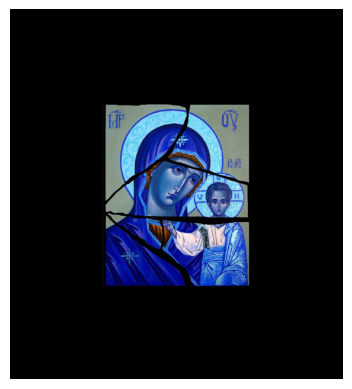

In [32]:
name = '1'
def add_border(image_path, border_size, color):
    """
    Добавляет рамку к изображению.

    :param image_path: Путь к изображению.
    :param border_size: Размер рамки.
    :param color: Цвет рамки в формате (B, G, R).
    """
    # Считываем изображение
    image = cv2.imread(image_path)
    
    # Проверяем, что изображение было загружено
    if image is None:
        print("Ошибка: изображение не найдено.")
        return
    
    # Добавляем рамку
    bordered_image = cv2.copyMakeBorder(image, border_size, border_size, border_size, border_size, 
                                         cv2.BORDER_CONSTANT, value=color)
    
    save_image(bordered_image, f'pics/test1/bordered.png')
    # save_image(bordered_image, f'pics/test2/bordered.png')
    
    # Показываем изображение с рамкой
    show(bordered_image)

# Пример использования

# (255, 255, 255) white
# (0, 0, 0) black
add_border(f'pics/test1/cutted.jpg', 300, (0, 0, 0))  
# add_border(f'pics/test2/cutted.jpg', 300, (0, 0, 0))  


Изображение сохранено как pics/shifted_2_.png


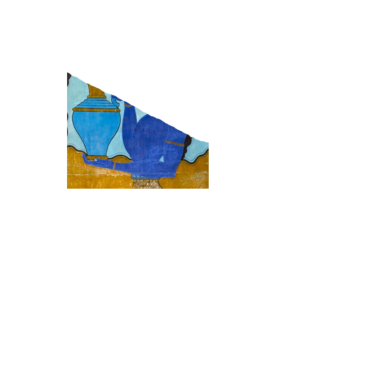

In [ ]:
name = '2_'
def shift_image(image_path, shift_x, shift_y):
    """
    Смещает изображение на указанные координаты.

    :param image_path: Путь к изображению.
    :param shift_x: Смещение по оси X.
    :param shift_y: Смещение по оси Y.
    """
    # Считываем изображение
    image = cv2.imread(image_path)
    
    # Проверяем, что изображение было загружено
    if image is None:
        print("Ошибка: изображение не найдено.")
        return
    
    # Получаем размеры изображения
    h, w, _ = image.shape
    
    # Создаем пустое изображение с белым фоном
    shifted_image = np.ones_like(image) * 255
    
    # Смещаем изображение
    shifted_image[max(0, shift_y):min(h, h + shift_y), max(0, shift_x):min(w, w + shift_x)] = image[max(0, -shift_y):min(h, h - shift_y), max(0, -shift_x):min(w, w - shift_x)]
    
    save_image(shifted_image, f'pics/shifted_{name}.png')
    
    # Показываем смещенное изображение
    show(shifted_image)

shift_image(f'pics/bordered_{name}.png', -150, -200)  # Смещение изображения на 50 пикселей по обеим осям


In [33]:
import cv2
import numpy as np

# Загрузка изображения
# image = cv2.imread('pics/test1/bordered.png')
image = cv2.imread('pics/test2/bordered.png')

# Перевод в HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Диапазон чёрного
lower_black = np.array([0, 0, 0])
upper_black = np.array([180, 255, 50])

# Создание маски: чёрное — 255, остальное — 0
black_mask = cv2.inRange(hsv, lower_black, upper_black)

# Инвертируем: чёрные части станут 0, остальные 255
mask = cv2.bitwise_not(black_mask)

# Сохраняем 
# cv2.imwrite("pics/test1/mask.png", mask)
cv2.imwrite("pics/test2/mask.png", mask)

True